<a href="https://colab.research.google.com/github/wlrjs1300-coder/AI_26/blob/main/05_02_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 지금까지 배운 알고리즘은 훈련세트와 테스트세트를 나누어 평가를 진행하는데
# 테스트세트를 이용해 평가하면 결국 테스트세트에 맞는 모델이 만들어진다.
# 테스트세트를 이용해 평가할 때, 일반화 성능을 올바르게 예측하려면
# 가능한 테스트세트를 사용하지 말아야 한다.
# 모델을 만들고 마지막 딱 한번만 사용하는 것이 좋다.

# 결정트리에서 배운 max_depth=3으로 테스트 해봤는데 최선일까?
# 결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝을 해보자

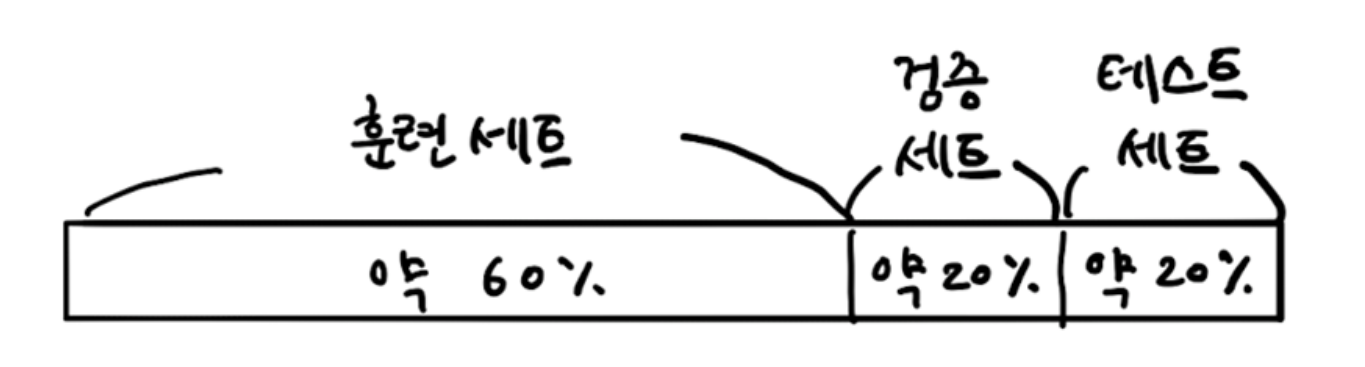

In [ ]:
# 검증세트

# 테스트세트를 사용하지 않으려면 모델이 과대적합인지 과소적합인지 판단하기 어렵다.
# 테스트세트를 사용하지 않고 측정하는 간단한 방법은 훈련세트를 또 나누는 것이다.
# 훈련세트 60%, 검증세트 20%, 테스트세트 20% -> 실무에서 많이 쓰는 기법

# 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있다.
# 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐
# 전체 훈련데이터에서 모델을 다시 훈련한다.
# 마지막 테스트에서 최종 점수를 평가한다.

# 결론
# 훈련세트를 이용해 모델을 훈련, 검증세트를 이용해 모델을 검증
# 마지막 테스트세트를 이용해 평가한다.

In [2]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
# 훈련세트와 테스트세트 나누기
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)
# 훈련용 5197개(80%), 테스트용 1300개(20%) - 총 6497개

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [3]:
# 나눈 훈련세트를 한번 더 나누어 검증세트 만들기
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)
print(sub_input.shape, val_input.shape)
# 훈련용 4157개(80%), 검증용 1040개(20%) - 총 5197개

(4157, 3) (1040, 3)


In [4]:
# 나눈 훈련세트(sub_input, sub_target)와 검증세트(val_input, val_target) 을 사용해 모델을 만들고 평가한다.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target) # 훈련

print(dt.score(sub_input, sub_target)) # 평가결과 : 99.71% (과대적합)
print(dt.score(val_input, val_target)) # 검증결과 : 86.44%
# 매개변수를 바꿔서 더 좋은 모델을 찾아야 한다.

0.9971133028626413
0.864423076923077


In [6]:
# 검증세트를 만들기 위해 훈련세트가 줄었다. (이럴 때 많은 데이터를 훈련하면 좋은 결과가 나온다.)

# 교차검증 : 검증 세트를 때어내어 평가하는 과정을 여러번 반복한다.
# [훈련세트, 훈련세트, 검증세트]
# [훈련세트, 검증세트, 훈련세트]
# [검증세트, 훈련세트, 훈련세트] -> 패리티 방식 (3-폴드 교차검증)
# 5-폴드, 10-폴드도 있다.
# 사이킷런에서는 corss_validate()라는 교차검증 함수를 사용한다.

from sklearn.model_selection import cross_validate

# 평가할 모델 객체를 첫번째 매개변수로 전달 (검증세트를 따로 나누지 않고 전체 훈련세트를 전달)
scores = cross_validate(dt, train_input, train_target)
# scores = cross_validate(dt, train_input, train_target, cv=5)
# cv 매개변수를 이용해 폴드 수를 변경한다. (cv=5 : 기본값)
print(scores)
# fit_time : 훈련시간, score_time : 검증시간, test_score : 최종점수
# 위와 같은 키를 가진 딕셔너리(k : v)를 반환한다.

{'fit_time': array([0.03090644, 0.02730584, 0.03720164, 0.0234499 , 0.01183343]), 'score_time': array([0.00241876, 0.00631285, 0.00390172, 0.00572872, 0.001755  ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [7]:
import numpy as np

print(np.mean(scores['test_score'])) # test_score : 검증세트 점수
# 검증점수의 평균을 내어 최종 점수를 얻는다. 85.53%

0.855300214703487


In [10]:
# train_test_split() : 전체데이터를 섞은 후 폴드를 나눈다.
# cross_validate()   : 전체데이터를 섞지 않고 폴드를 나눈다. -> 분할기 사용 (KFold, StratifiedKFold)

# 사이킷런의 분할기는 교차검증에서 폴드를 어떻게 나눌지를 결정한다.
# cross_validate()는 회귀모델에서는 KFold 분할기를
#                    분류모델에서는 StratifiedKFold 분할기를 사용한다.
# 만약 교차 검증을 할 때 훈련세트를 섞으려면 분할기(splitter)를 지정해야 한다.
# KFold : 순서대로 나눈다. (회귀모델)
# StratifiedKFold : 비율에 맞춰 나눈다. (분류모델)

from sklearn.model_selection import StratifiedKFold


splitter = StratifiedKFold()
scores = cross_validate(dt, train_input, train_target, cv=splitter)
# scores = cross_validate(dt, train_input, train_target, cv=StratifiedFold())
print(scores)

{'fit_time': array([0.03995419, 0.02489686, 0.03660274, 0.03190851, 0.02777839]), 'score_time': array([0.0070684 , 0.00421929, 0.00448704, 0.00619984, 0.0035708 ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [11]:
# {'fit_time': array([0.03995419, 0.02489686, 0.03660274, 0.03190851, 0.02777839]),
# 'score_time': array([0.0070684 , 0.00421929, 0.00448704, 0.00619984, 0.0035708 ]),
# 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])
print(np.mean(scores['test_score']))    # 85.53%

0.855300214703487


In [12]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#                         10개의 폴드로
#                                        섞어주세요
#                                                        랜덤으로
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores) # 10번의 교차검증이 진행되었다.
print(np.mean(scores['test_score']))    # 10번 교차 검증 후의 평균 : 85.74%
# {'fit_time': array([0.02096248, 0.01303887, 0.01342773, 0.01326561, 0.01312137, 0.01344132, 0.01330924, 0.01308727, 0.01296592, 0.01277423]),
# 'score_time': array([0.00189233, 0.00185776, 0.00205588, 0.0019815 , 0.00165224, 0.00210953, 0.00170207, 0.00186634, 0.00179029, 0.00180984]),
# 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385, 0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])

{'fit_time': array([0.02096248, 0.01303887, 0.01342773, 0.01326561, 0.01312137,
       0.01344132, 0.01330924, 0.01308727, 0.01296592, 0.01277423]), 'score_time': array([0.00189233, 0.00185776, 0.00205588, 0.0019815 , 0.00165224,
       0.00210953, 0.00170207, 0.00186634, 0.00179029, 0.00180984]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
0.8574181117533719


In [14]:
# 모델 파라미터 : 데이터로부터 스스로 배운 '내부 수치'
# 하이퍼파라미터 : 사람이 직접 손으로 입력하는 '세팅값'
# 하이퍼파라미터 튜닝 : 기본값으로 훈련을 시작해서 점차 최적의 값을 찾아가는 과정
# AutoML : AI가 대신 다 해주는 자동화 기술

# 결정트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아야한다.
# 매개변수의 값을 바꿔가며 최적의 값을 찾을 때
# 두개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 한다 - 다중 for문을 사용해야한다 (복잡)
# 그래서 사이킷런에서 제공하는 그리도서치(Grid Search)를 사용한다.

In [17]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} # 5번 증가

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

gs.fit(train_input, train_target)

# '전국 빵 맛집 경연 대회'에 비유
# params : 실험해 볼 레시피 후보들 (빵을 구울 대 설탕을 1g 넣을지 2g넣을지 고민)
# GridSearchCV : 자동 요리 및 심사 기계
# DecisionTreeClassifier : 만들 빵 메뉴 정하기
# cv=5 (기본값) : 빵 하나를 5명의 심사위원에게 맛보게한다. (교차검증)
# n_jobs=-1 : 한명이서 하려면 오래걸리니 모든 인원을 동원 (모든 CPU 사용)
# gs.fit() : 경연 시작!

# 요약
# 1. "설탕 양 후보 5개 정해줄게!" - params
# 2. "주방 화구 다써서(n_jobs=-1) 5명씩 교차 검증(cv=5)하며 테스트해봐!" - GridSearchCV
# 3. "테스트 끝나면 제일 맛있었던 레시피로 전체 반죽 다 써서 빵 하나 완성해!" - gs.fit

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [20]:
# 이렇게 최적화되어 훈련된 모델은 GridSearchCV 클래스로 만들어진
# 객체의 best_estimator_ 속성에 저장된다.
# 최적의 매개변수는 best_params_ 속에 저장된다.
print(f"그리드서치를 통해 찾은 최적의 모델의 정확도 : {dt.score(train_input, train_target)*100:.2f}%")
# 그리드서치를 통해 찾은 최적의 모델의 정확도 : 970.06%

# 쉽게 설명하자면,
# best_params_ = 최고의 모델을 얻기 위한 하이퍼파라미터 조합 (dict형태)
# best_estimator_ = 위의 하이퍼파라미터를 통해 학습된 최종 모델 객체

그리드서치를 통해 찾은 최적의 모델의 정확도 : 97.06%


In [22]:
print(f"최적의 매개변수 : {gs.best_params_}")
# print(f"최적의 매개변수 : {gs.best_params_}") = "실험해본 설정들 중 제일 성능이 좋았던 하이퍼파라미터 조합이 어떤건가요?"

# 교차검증 평균 점수는 cv_results_ dict에 mean_test_score 리스트로 저장된다.

최적의 매개변수 : {'min_impurity_decrease': 0.0001}


In [23]:
# 5번의 교차 검증으로 얻은 점수를 출력해본다.
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [24]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
# mean_test_score에 저장된 값들 중에서
# 가장 높은 평균 검증 점수를 가진 위치(인덱스)를 찾는다.

print(gs.cv_results_['params'][best_index]) # 앞에서 출력한 best_params_ 과 같은지 확인!
# 위에서 구한 인덱스를 이용해
# 해당 위치에 사용된 매개변수 조합을 가져온다.
# 이 값은 가장 높은 검증 성능을 만든 매개변수이다.

# ===== GridSearchCV 전체 과정 정리 =====

# 1. 실험할 매개변수 후보들을 미리 지정한다.

# 2. GridSearchCV가 각 매개변수 조합에 대해
#    교차 검증을 수행하고 평균 점수를 계산한다.
#    이 모든 결과는 cv_results_ 속성에 저장된다.

# 3. 가장 높은 평균 검증 점수를 만든 매개변수를 선택한다.
#    그리고 그 매개변수로 전체 훈련 데이터를 다시 학습하여
#    최종 모델을 생성한다.

{'min_impurity_decrease': 0.0001}


In [25]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),   # 9번, 값이 작으면 : 트리가 복잡(쉽게나눠서), 값이 크면 : 트리가 단순(잘 나누지 않아서)
          'max_depth': range(5, 20, 1),                                # 15번, 깊을수록 : 복잡, 얕을수록 : 단순
          'min_samples_split': range(2, 100, 10)}                      # 10번 값이 작으면 : 쉽게 나눔, 값이 크면 : 잘 나누지 않음
                                                                       # 9 * 15 * 10 = 총 6,750번의 학습 진행
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
# DecisionTreeClassifier를 기반으로 GridSearchCV 객체 생성
# DecisionTreeClassifier를 만들건데 위에서 만든 params를 전부 시도하고, n_job=-1을 통해 CPU 전부 사용해라 (속도 최대)
gs.fit(train_input, train_target) # 훈련시작

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [26]:
print(gs.best_params_)  # 최상의 매개변수 조합확인
# {'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [27]:
print(np.max(gs.cv_results_['mean_test_score'])) # 최상의 교차 점수 확인

0.8683865773302731


In [28]:
# 그리드서치(GridSearch)는 너무 많은 매개 변수 조건이 있어 수행 시간이 오래 걸린다.
# 그의 해결법 : 랜덤서치(RandomizedSearchCV)를 사용해보자!

# 랜덤서치 : 모든 값을 나열하는 대신, 지정한 범위 안에서의 값을 무작위로 샘플링하여 탐색
# 즉, 매개변수 후보 목록을 직접 전달하는 것이 아니라 값을 생성할 수 있는 "확률 분포 객체"를 전달

# scipy.stats : 확률 분포 관련 기능을 제공하는 라이브러리
from scipy.stats import uniform, randint

# randint(a,b)
# a 이상 b 미만 범위에서 정수를 무작위로 추출
# 주로 max_depth,min_samples_split 같은 정수형 매개변수에 사용

# uniform(a,b)
# a 이상 a+b 범위에서 실수를 무작위로 추출
# 연속적인 실수 값을 가지는 매개변수에 사용

# 두 함수 모둔 균등 분포를 따르며,
# 범위 내의 모든 값이 동일한 확률로 선택

In [29]:
# 랜덤서치 테스트

rgen = randint(0,10) # 10개 숫자 샘플링
# 0 이상 10 미만 범위에서 정수를 생성하는 확률 분포 객체 생성
# 0~9 사이의 정수를 무작위로 뽑는다.

rgen.rvs(10)
# 실행할 때마다 다른 값이 출력되며,
# 범위 내의 정수가 동일한 확률로 선택된다.
# 표번 개수가 적으면 값이 고르게 보이지 않을 수 있지만,
# 추출 개수를 크게 늘리면 전체적으로 균등하게 분포되는 모습을 확인할 수 있다.

#.rvs(n) : 해당 분포에서 n개의 난수를 추출
# array([8, 9, 6, 3, 6, 6, 2, 7, 1, 4])

array([8, 9, 6, 3, 6, 6, 2, 7, 1, 4])

In [30]:
np.unique(rgen.rvs(1000), return_counts=True)
# rgen.rvs(n) : 0~9 사이 숫자를 n번 뽑는다.
# .unique() : 중복은 제거하고 고유한 값만 남긴다.
# return_counts = True : 각 값이 몇 번 나왔는지 알려준다.

# (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
#  array([ 81, 109,  99,  92, 111,  94, 111,  99, 111,  93]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 81, 109,  99,  92, 111,  94, 111,  99, 111,  93]))

In [31]:
ugen = uniform(0, 1) # 실수형 테스트
ugen.rvs(10)    # 난수발생기(랜덤과 유사)


array([0.92279133, 0.58944892, 0.18097209, 0.97166936, 0.82372938,
       0.78325253, 0.40677699, 0.23708275, 0.9083517 , 0.79733526])

In [32]:
# 탐색할 매개변수의 딕서너리를 만들어 봄
# min_samples_leaf을 탐색 대상에 추가 (랜덤값을 하이퍼파라이터값으로 적용)
params = {'min_impurity_decrease': uniform(0.0001, 0.001), # 0.00001 ~ 0.001의 실수값
          'max_depth': randint(20, 50),                   # 20~50 사이의 정수
          'min_samples_split': randint(2, 25),            # 2~25 사이의 정수
          'min_samples_leaf': randint(1, 25),             # 1~25 사이의 정수
          # 리프 노드가 되기 위한 최소 샘플 개수(지식 노드의 샘플 수가 이 값보다 작으면 분할 하지 않음)
          }

In [33]:
# 어짜피 하이퍼파라미터의 매개값을 랜덤으로 하기로 했으니 검증하는 cv클래스도 랜덤용으로 사용해보자.
# 샘플링 횟수는 사이킷런의 램덤 서치 클래스인 RandomizedSearchCV의 n_iter 매개변수에 지정
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
# n_iter=100 총 100번을 샘플링하여 교차 검증을 수행(최적의 매개변수 조합을 찾음)

gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e45256d1f40>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e45256d16a0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e45256d3c20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e45256d1ca0>},
                   random_state=42)

In [34]:
print(gs.best_params_) # 결과 최적의 매개변수 조합을 찾음
# {'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173,
#  'min_samples_leaf': 7, 'min_samples_split': 13}

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [35]:
print(np.max(gs.cv_results_['mean_test_score'])) # 최고의 교차 검증 점수 확인
# 86.95%의 검증 점수

0.8695428296438884


In [36]:
dt = gs.best_estimator_
# 최종 모델로 결정하고 테스트 세트의 성능을 확인
print(dt.score(test_input, test_target))    # 검증점수 86.95% , 테스트점수 86.00%

0.86


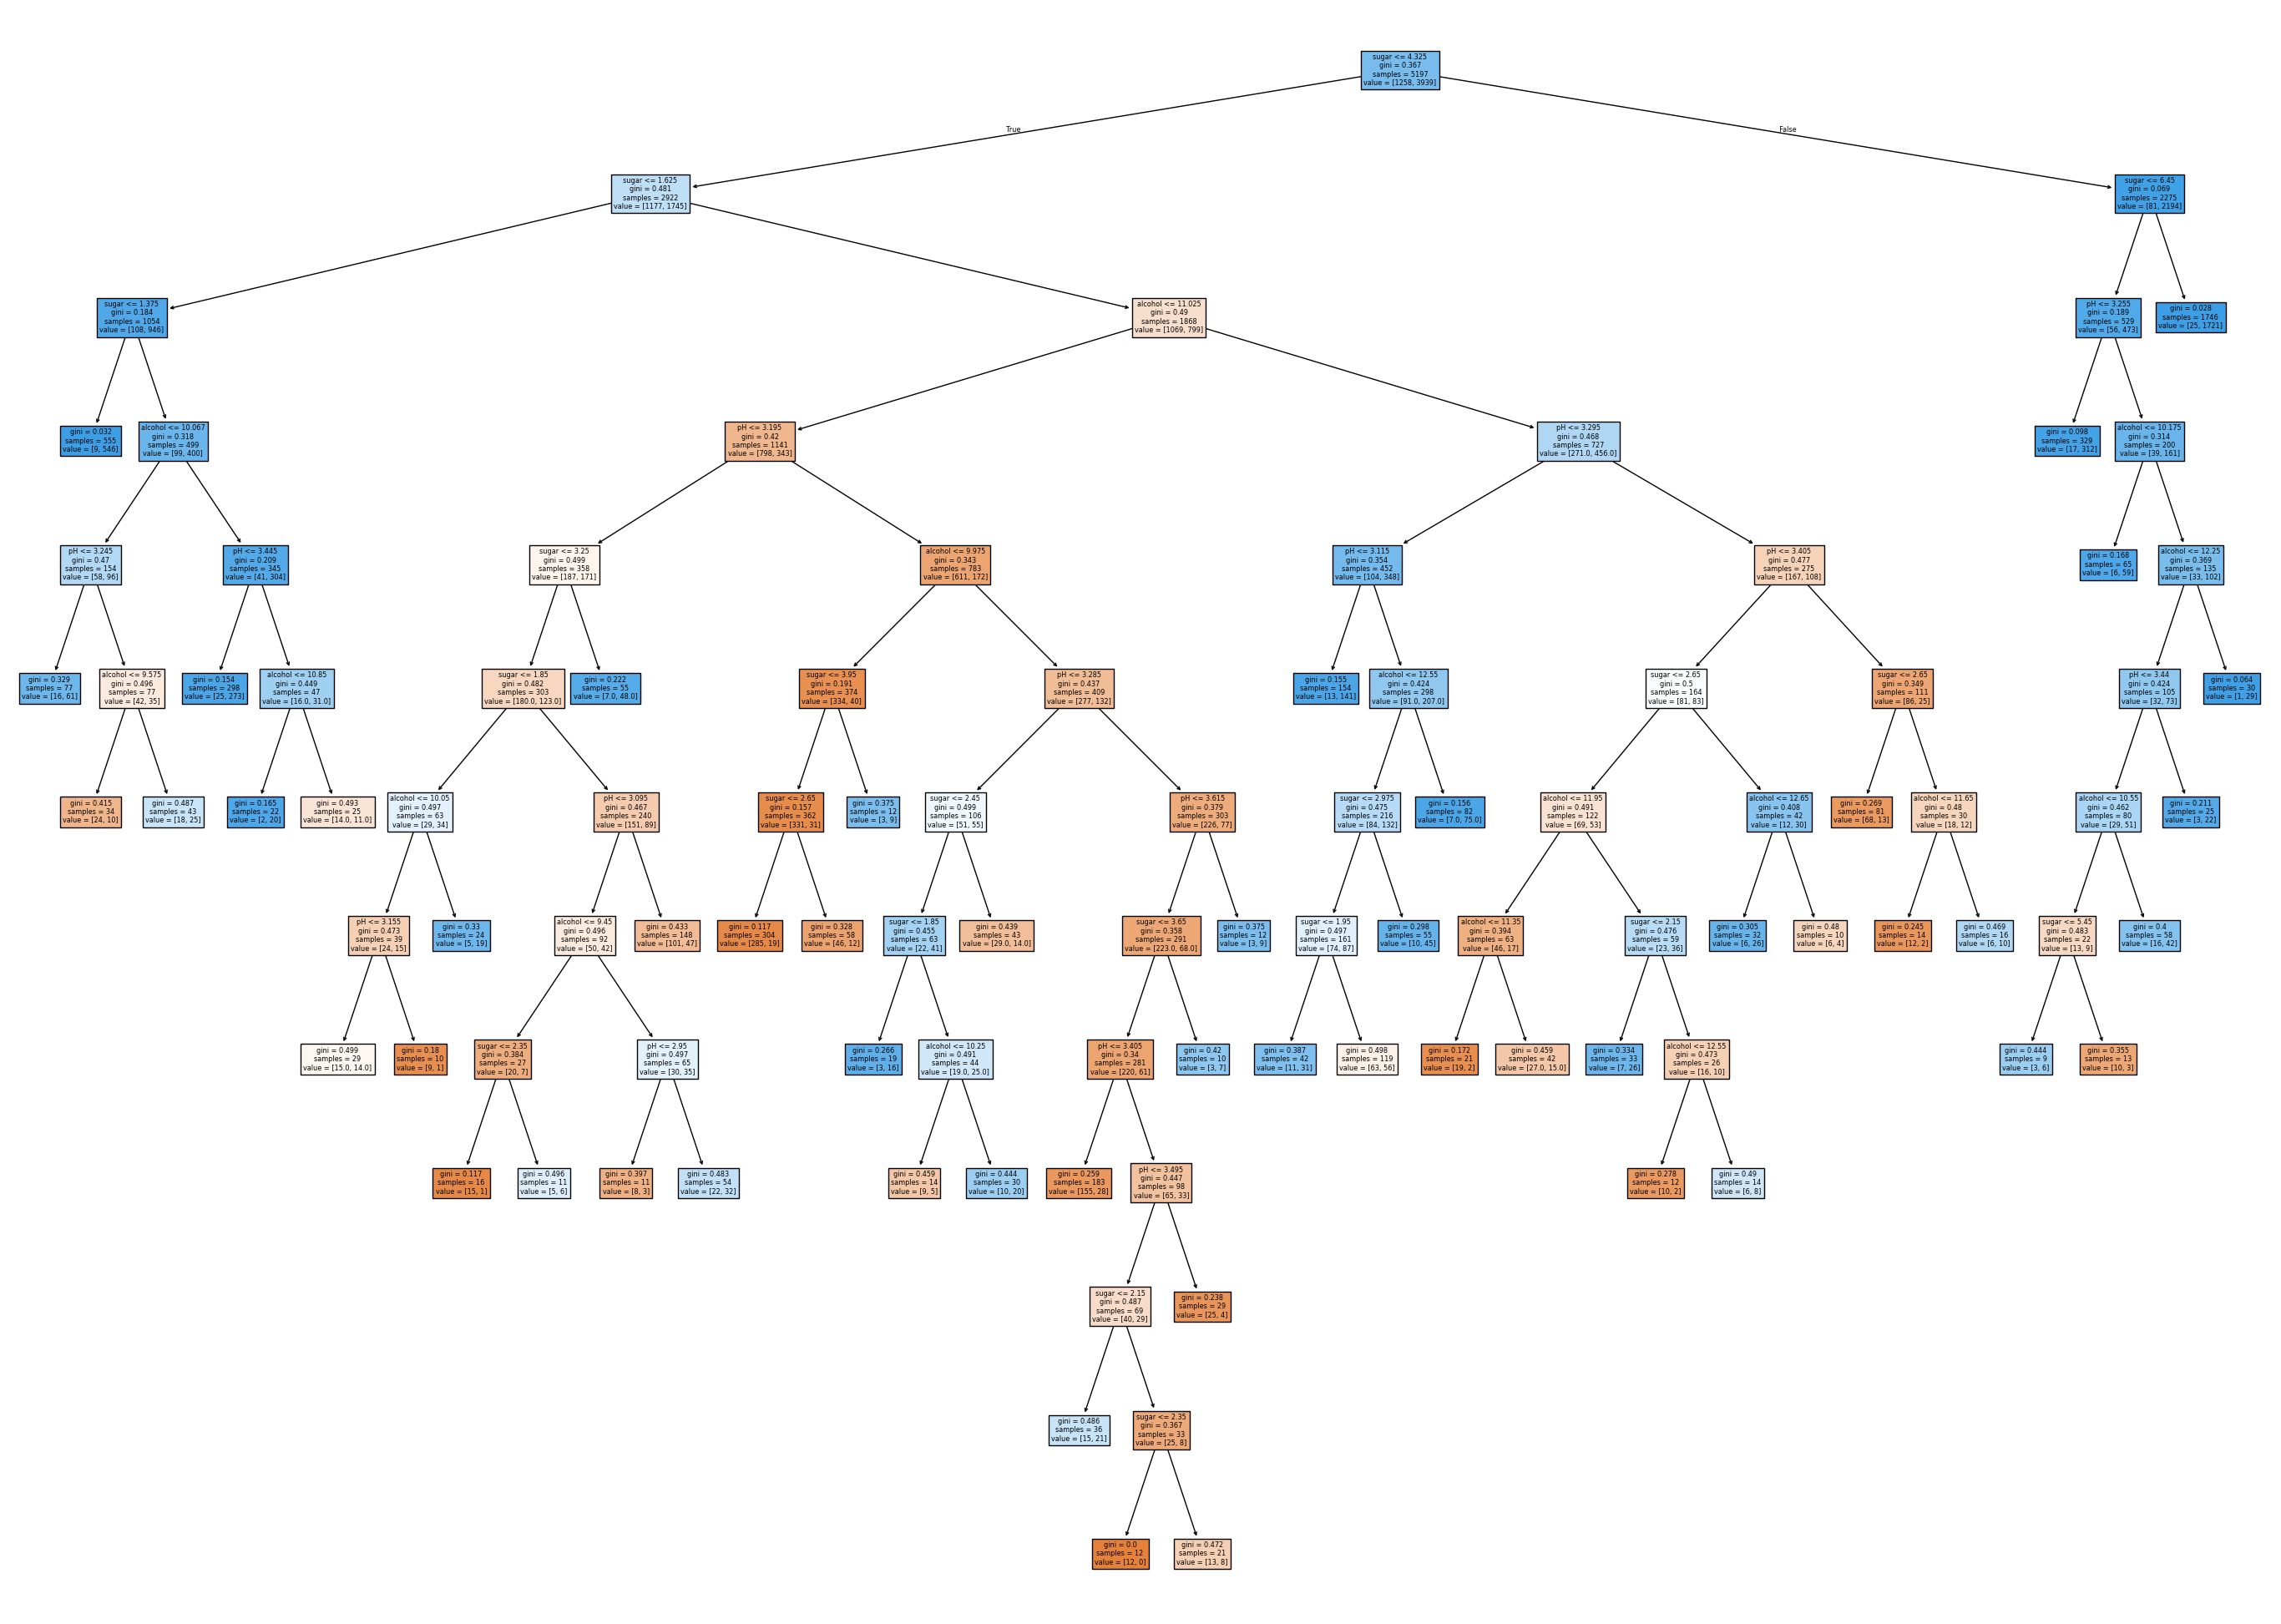

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(35,25))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()